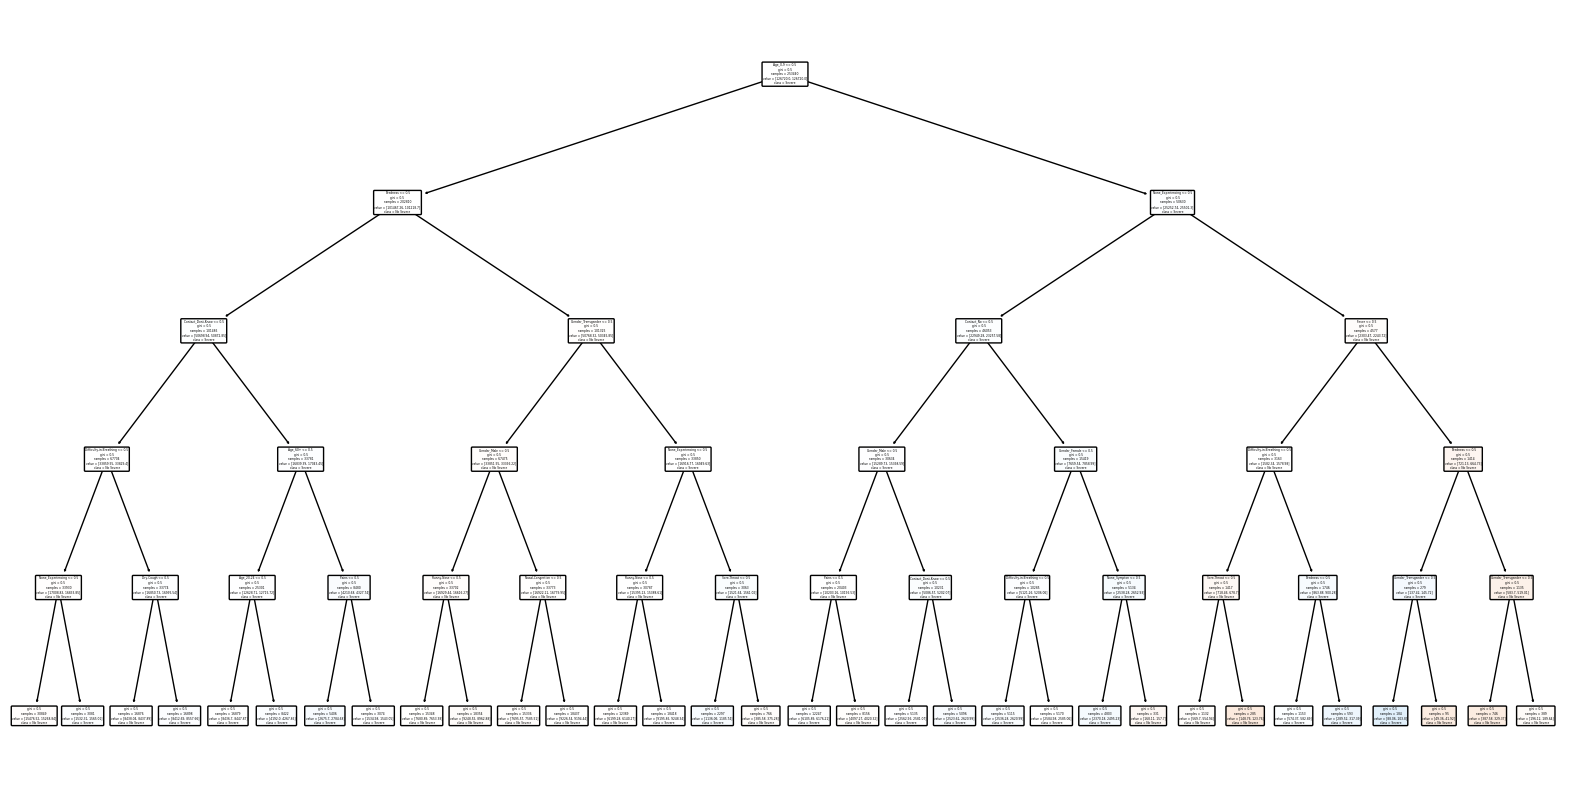

                         Importance
Tiredness                  0.130292
Difficulty-in-Breathing    0.129978
Gender_Transgender         0.128725
None_Experiencing          0.093592
Sore-Throat                0.065380
Runny-Nose                 0.064816
Pains                      0.054778
Contact_Dont-Know          0.049500
Age_0-9                    0.048435
Fever                      0.048157
Gender_Male                0.043050
None_Sympton               0.032295
Contact_No                 0.028397
Age_60+                    0.021461
Gender_Female              0.021163
Dry-Cough                  0.019690
Age_20-24                  0.012369
Nasal-Congestion           0.007922
Diarrhea                   0.000000
Age_10-19                  0.000000
Age_25-59                  0.000000
Contact_Yes                0.000000
              precision    recall  f1-score   support

   No Severe       0.74      0.54      0.63     47641
      Severe       0.24      0.43      0.30     15719

    accu

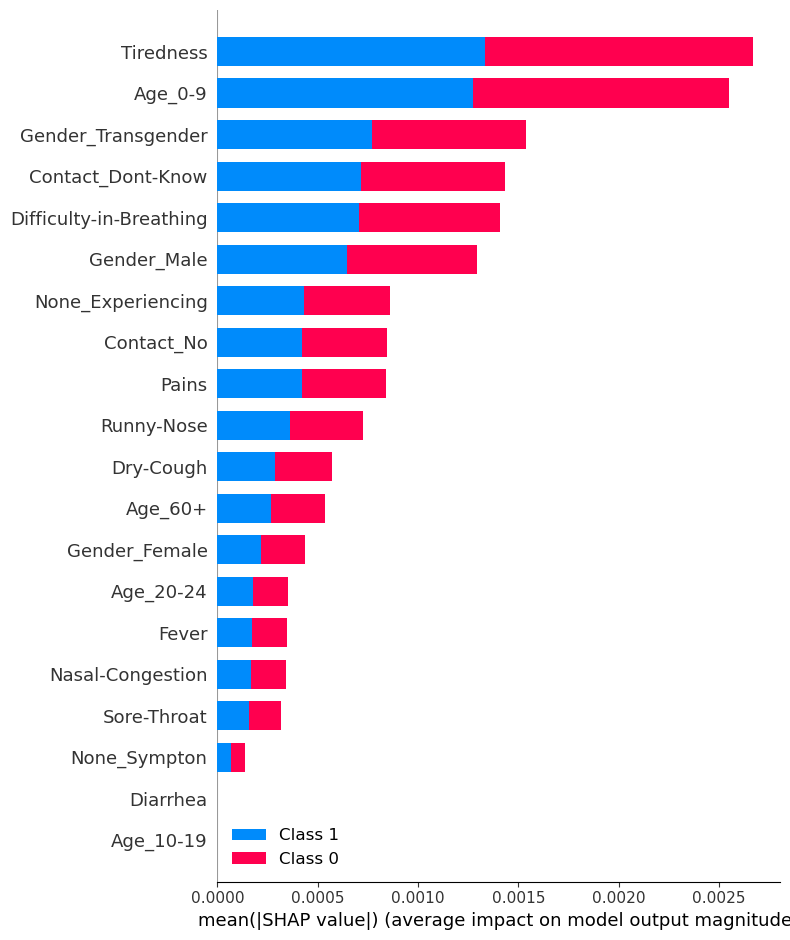

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import shap
data = pd.read_csv('C:/Users/jhonn/Downloads/Etapa4/Cleaned-Data.csv')

features = data.drop(columns=['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe', 'Country'])
target = data['Severity_Severe']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

decision_tree_balanced = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,  
    min_samples_split=50,
    min_samples_leaf=25,
    random_state=42
    )
decision_tree_balanced.fit(X_train, y_train)

y_pred_balanced = decision_tree_balanced.predict(X_test)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_balanced, filled=True, feature_names=features.columns.tolist(), class_names=['No Severe', 'Severe'], rounded=True, proportion=False, precision=2)
plt.show()

importances_balanced = decision_tree_balanced.feature_importances_
feature_importances_balanced = pd.DataFrame(importances_balanced, index=features.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importances_balanced)

report_balanced = classification_report(y_test, y_pred_balanced, target_names=['No Severe', 'Severe'], zero_division=0)
print(report_balanced)

shap_explainer = shap.TreeExplainer(decision_tree_balanced)

shap_values = shap_explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

